In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from math import sqrt
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras import metrics
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)

# aggregazione dati per celle
agg_by_cell = data.groupby(by = ['cell_num'])

In [2]:
trend_data = []
residual_data = []
seasonal_data = []

In [3]:
for i, k in agg_by_cell:
    
    dates4dec = []
    cell_values = []
    k = k.iloc[::4,:]
    print(len(k))
    for index, row in k.iterrows():
        
        date = row['date']
        h = str(row['hours'])
   
        h = h.split('.')
    
        if len(h[0])<2:
            h = h[1]+h[0]
        else: 
            h = h[0]
   
        minutes = str(row['minutes'])
        m = ''
        minutes = minutes.split('.')
        if len(minutes[0])<2: 
            m = minutes[0] +'0'
        else: 
            m = minutes[0]
        #print(date, h, m)
        data_f = date+' '+h+':'+m+':'+'00'
        #print(data_f)
        cell_values.append(row['nr_people'])
        dates4dec.append(data_f) 
        
    dict_i = {'ds': dates4dec, 'y':cell_values}
    data4deco = pd.DataFrame(dict_i, index=None, columns=None)  
    #print(data4deco)
    data4deco['ds'] = pd.to_datetime(data4deco['ds'])
    data4deco = data4deco.set_index('ds')
    #print(data4deco)
    decomp = decompose(data4deco['y'], period=24)
    #with plt.rc_context():
    #    plt.rc("figure", figsize=(20,8))
    #    decomp.plot()
    #    plt.show()
    trend = decomp.trend.values
    print(trend[:10])
    seasonal = decomp.seasonal.values
    residual = decomp.resid.values
    
        
    trend = trend.reshape((len(trend), 1))
    seasonal = seasonal.reshape((len(seasonal), 1))
    residual = residual.reshape((len(residual), 1))
     
    seasonal = seasonal.astype(int)    
    residual = residual.astype(int)
    trend = trend.astype(int)
    print(trend[:10])
    trend_data.append(trend)
    seasonal_data.append(seasonal)
    residual_data.append(residual)

2952
[36.58638794 36.59382377 36.6012596  36.60869543 36.61613126 36.62356709
 36.63100291 36.63843874 36.64587457 36.6533104 ]
[[36]
 [36]
 [36]
 [36]
 [36]
 [36]
 [36]
 [36]
 [36]
 [36]]
2952
[40.20226828 40.21005418 40.21784008 40.22562598 40.23341188 40.24119778
 40.24898368 40.25676957 40.26455547 40.27234137]
[[40]
 [40]
 [40]
 [40]
 [40]
 [40]
 [40]
 [40]
 [40]
 [40]]
2952
[42.11363646 42.12121945 42.12880243 42.13638542 42.14396841 42.1515514
 42.15913438 42.16671737 42.17430036 42.18188334]
[[42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]]
2952
[42.5161606  42.52357758 42.53099456 42.53841154 42.54582852 42.5532455
 42.56066248 42.56807946 42.57549645 42.58291343]
[[42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]]
2952
[42.22365192 42.2303766  42.23710129 42.24382598 42.25055067 42.25727536
 42.26400004 42.27072473 42.27744942 42.28417411]
[[42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]]
2952
[41.73186664 41.73667929 41.74149194 41.7463046  41.

[52.77794182 52.77775186 52.77756191 52.77737196 52.77718201 52.77699205
 52.7768021  52.77661215 52.7764222  52.77623224]
[[52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]]
2952
[51.0367739  51.03582211 51.03487033 51.03391855 51.03296676 51.03201498
 51.0310632  51.03011141 51.02915963 51.02820785]
[[51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]]
2952
[333.65063461 333.64474841 333.63886221 333.632976   333.6270898
 333.6212036  333.61531739 333.60943119 333.60354498 333.59765878]
[[333]
 [333]
 [333]
 [333]
 [333]
 [333]
 [333]
 [333]
 [333]
 [333]]
2952
[433.13765532 433.13294174 433.12822815 433.12351457 433.11880099
 433.11408741 433.10937382 433.10466024 433.09994666 433.09523308]
[[433]
 [433]
 [433]
 [433]
 [433]
 [433]
 [433]
 [433]
 [433]
 [433]]
2952
[393.55033855 393.54986357 393.5493886  393.54891362 393.54843865
 393.54796367 393.5474887  393.54701372 393.54653875 393.54606377]
[[393]
 [393]
 [393]
 [393]
 [393]
 [393]
 [393]
 [393]
 [393]
 [393]]
2

[46.82783334 46.83406857 46.84030381 46.84653904 46.85277427 46.85900951
 46.86524474 46.87147998 46.87771521 46.88395044]
[[46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]]
2952
[41.11419971 41.12162556 41.12905141 41.13647726 41.14390311 41.15132896
 41.15875481 41.16618066 41.17360651 41.18103236]
[[41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]]
2952
[92.21546518 92.23304527 92.25062535 92.26820544 92.28578553 92.30336561
 92.3209457  92.33852578 92.35610587 92.37368595]
[[92]
 [92]
 [92]
 [92]
 [92]
 [92]
 [92]
 [92]
 [92]
 [92]]
2952
[215.03442106 215.07804886 215.12167666 215.16530447 215.20893227
 215.25256007 215.29618787 215.33981568 215.38344348 215.42707128]
[[215]
 [215]
 [215]
 [215]
 [215]
 [215]
 [215]
 [215]
 [215]
 [215]]
2952
[154.10201938 154.13153263 154.16104587 154.19055912 154.22007236
 154.24958561 154.27909885 154.3086121  154.33812534 154.36763859]
[[154]
 [154]
 [154]
 [154]
 [154]
 [154]
 [154]
 [154]
 [154]
 [154]]
2952
[181.60660797 1

[587.00909588 587.06388747 587.11867906 587.17347066 587.22826225
 587.28305385 587.33784544 587.39263704 587.44742863 587.50222023]
[[587]
 [587]
 [587]
 [587]
 [587]
 [587]
 [587]
 [587]
 [587]
 [587]]
2952
[197.62554005 197.63312968 197.64071931 197.64830894 197.65589857
 197.66348819 197.67107782 197.67866745 197.68625708 197.69384671]
[[197]
 [197]
 [197]
 [197]
 [197]
 [197]
 [197]
 [197]
 [197]
 [197]]
2952
[24.97778966 24.97864976 24.97950985 24.98036994 24.98123003 24.98209013
 24.98295022 24.98381031 24.9846704  24.9855305 ]
[[24]
 [24]
 [24]
 [24]
 [24]
 [24]
 [24]
 [24]
 [24]
 [24]]
2952
[27.0988629  27.09869035 27.09851779 27.09834524 27.09817269 27.09800013
 27.09782758 27.09765503 27.09748247 27.09730992]
[[27]
 [27]
 [27]
 [27]
 [27]
 [27]
 [27]
 [27]
 [27]
 [27]]
2952
[26.12760518 26.12749027 26.12737537 26.12726047 26.12714557 26.12703067
 26.12691577 26.12680087 26.12668597 26.12657107]
[[26]
 [26]
 [26]
 [26]
 [26]
 [26]
 [26]
 [26]
 [26]
 [26]]
2952
[27.85232025 27

[167.62773899 167.63111515 167.6344913  167.63786746 167.64124362
 167.64461977 167.64799593 167.65137209 167.65474824 167.6581244 ]
[[167]
 [167]
 [167]
 [167]
 [167]
 [167]
 [167]
 [167]
 [167]
 [167]]
2952
[359.29904352 359.31216601 359.3252885  359.33841099 359.35153348
 359.36465597 359.37777846 359.39090095 359.40402344 359.41714593]
[[359]
 [359]
 [359]
 [359]
 [359]
 [359]
 [359]
 [359]
 [359]
 [359]]
2952
[328.17058298 328.18138711 328.19219124 328.20299537 328.2137995
 328.22460364 328.23540777 328.2462119  328.25701603 328.26782016]
[[328]
 [328]
 [328]
 [328]
 [328]
 [328]
 [328]
 [328]
 [328]
 [328]]
2952
[216.97785874 216.97684405 216.97582935 216.97481466 216.97379997
 216.97278528 216.97177059 216.9707559  216.96974121 216.96872651]
[[216]
 [216]
 [216]
 [216]
 [216]
 [216]
 [216]
 [216]
 [216]
 [216]]
2952
[374.87441415 374.91149356 374.94857297 374.98565238 375.02273179
 375.05981119 375.0968906  375.13397001 375.17104942 375.20812883]
[[374]
 [374]
 [374]
 [374]
 [37

[162.14664687 162.14689975 162.14715264 162.14740552 162.14765841
 162.14791129 162.14816418 162.14841707 162.14866995 162.14892284]
[[162]
 [162]
 [162]
 [162]
 [162]
 [162]
 [162]
 [162]
 [162]
 [162]]
2952
[190.67417906 190.67314692 190.67211478 190.67108264 190.6700505
 190.66901836 190.66798622 190.66695408 190.66592194 190.6648898 ]
[[190]
 [190]
 [190]
 [190]
 [190]
 [190]
 [190]
 [190]
 [190]
 [190]]
2952
[95.91540845 95.91377718 95.9121459  95.91051462 95.90888334 95.90725206
 95.90562078 95.9039895  95.90235822 95.90072694]
[[95]
 [95]
 [95]
 [95]
 [95]
 [95]
 [95]
 [95]
 [95]
 [95]]
2952
[18.04995853 18.0499954  18.05003226 18.05006912 18.05010599 18.05014285
 18.05017972 18.05021658 18.05025345 18.05029031]
[[18]
 [18]
 [18]
 [18]
 [18]
 [18]
 [18]
 [18]
 [18]
 [18]]
2952
[17.84715727 17.84707229 17.84698732 17.84690234 17.84681736 17.84673239
 17.84664741 17.84656243 17.84647746 17.84639248]
[[17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]]
2952
[17.58359567 17.

In [4]:
final_data_trend = hstack((trend_data))
final_data_seasonal = hstack((seasonal_data))
final_data_residual = hstack((residual_data))

In [5]:
final_data_residual[4]

array([   0,    0,    0,    0,    0,    0,   -6,   -6,   -6,   -6,   -5,
        -68,  -68,  -32,  -14,   -1,   -3,   -2,    0,    0,    0,    0,
          0,   -5,   -6,   -6,   -6,  -11,  -78,  -50,  -36,  -20,   -2,
        -14,   -5,    0,    0,    0,    0,    0,   -5,   -6,   -5,   -5,
         -8,  -48,  -51,  -45,  -29,  -12,  -19,  -12,   -2,    1,    0,
          0,    0,   -4,   -5,   -5,   -5,   -6,   -5,   -9,  -16,  -24,
        -13,  -20,  -13,    0,    2,    1,    1,    1,   -3,   -5,   -4,
         -5,   -5,   -7,   -4,   -2,   -4,  -10,  -18,   -3,    0,    0,
          3,    4,    1,  -30, -133,  -35,   -5,  -11,   -5,   -3,   -1,
         -2,   -2,  -25,   -1,   -1,    0,    2,    4,   16,   14,  -20,
        -22,  -24,   -2,   -2,   -2,   -1,   -1,   -5,  -26,   -1,   -2,
          0,    1,    4,    8,   23,    0,    0,   -7,   -1,   -2,   -2,
         -3,   -2,   -9,  -24,   -7,   -3,   -6,    0,   23,   45,   18,
          2,    0,    0,   -2,   -2,   -1,   -3,   

In [6]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
          break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

# choose a number of time steps
n_steps_in, n_steps_out = 24, 12

In [7]:
# convert into input/output
X_seasonal, y_seasonal = split_sequences(final_data_seasonal, n_steps_in, n_steps_out)
X_trend, y_trend = split_sequences(final_data_trend, n_steps_in, n_steps_out)
X_residual, y_residual = split_sequences(final_data_residual, n_steps_in, n_steps_out)

count = 0
for i in range(len(X_seasonal)):
    count += 1
    print('inizia iterazione ', i)
    print(X_seasonal[i], y_seasonal[i])
    if count > 4: break

# flatten input season
n_input_seasonal = X_seasonal.shape[1] * X_seasonal.shape[2]
X_seasonal = X_seasonal.reshape((X_seasonal.shape[0], n_input_seasonal))
# flatten output
n_output_seasonal = y_seasonal.shape[1] * y_seasonal.shape[2]
y_seasonal = y_seasonal.reshape((y_seasonal.shape[0], n_output_seasonal))


# flatten input trend
n_input_trend = X_trend.shape[1] * X_trend.shape[2]
X_trend = X_trend.reshape((X_trend.shape[0], n_input_trend))
# flatten output
n_output_trend = y_trend.shape[1] * y_trend.shape[2]
y_trend = y_trend.reshape((y_trend.shape[0], n_output_trend))

# flatten input residual
n_input_residual = X_residual.shape[1] * X_residual.shape[2]
X_residual = X_residual.reshape((X_residual.shape[0], n_input_residual))
# flatten output residual
n_output_residual = y_residual.shape[1] * y_residual.shape[2]
y_residual = y_residual.reshape((y_residual.shape[0], n_output_residual))

inizia iterazione  0
[[  2   1   1 ...   0   1   0]
 [ -3  -4  -5 ...   0   1   0]
 [ -7 -10 -11 ...   0   2   0]
 ...
 [ 12  13  14 ...   0   0   0]
 [  7   7   7 ...   0   1   0]
 [  3   3   2 ...   0   1   0]] [[  2   1   1 ...   0   1   0]
 [ -3  -4  -5 ...   0   1   0]
 [ -7 -10 -11 ...   0   2   0]
 ...
 [-14 -15 -15 ...   0   6   2]
 [ -6  -6  -6 ...   0   4   1]
 [ -4  -3  -3 ...   0   0   0]]
inizia iterazione  1
[[ -3  -4  -5 ...   0   1   0]
 [ -7 -10 -11 ...   0   2   0]
 [-11 -13 -14 ...   0   2   0]
 ...
 [  7   7   7 ...   0   1   0]
 [  3   3   2 ...   0   1   0]
 [  2   1   1 ...   0   1   0]] [[ -3  -4  -5 ...   0   1   0]
 [ -7 -10 -11 ...   0   2   0]
 [-11 -13 -14 ...   0   2   0]
 ...
 [ -6  -6  -6 ...   0   4   1]
 [ -4  -3  -3 ...   0   0   0]
 [ -1  -1  -1 ...   0  -2   0]]
inizia iterazione  2
[[ -7 -10 -11 ...   0   2   0]
 [-11 -13 -14 ...   0   2   0]
 [-14 -17 -18 ...   0   2   0]
 ...
 [  3   3   2 ...   0   1   0]
 [  2   1   1 ...   0   1   0]
 [ -3  -4

In [8]:
split_train_test = int(len(X_trend)*0.75)
train_X_trend, test_X_trend = X_trend[:split_train_test], X_trend[split_train_test:]
train_y_trend, test_y_trend = y_trend[:split_train_test], y_trend[split_train_test:]
print(len(train_X_trend), len(train_y_trend), len(test_X_trend), len(test_y_trend))

train_X_seasonal, test_X_seasonal = X_seasonal[:split_train_test], X_seasonal[split_train_test:]
train_y_seasonal, test_y_seasonal = y_seasonal[:split_train_test], y_seasonal[split_train_test:]
print(len(train_X_seasonal), len(train_y_seasonal), len(test_X_seasonal), len(test_y_seasonal))

train_X_residual, test_X_residual = X_residual[:split_train_test], X_residual[split_train_test:]
train_y_residual, test_y_residual = y_residual[:split_train_test], y_residual[split_train_test:]
print(len(train_X_residual), len(train_y_residual), len(test_X_residual), len(test_y_residual))

2187 2187 730 730
2187 2187 730 730
2187 2187 730 730


In [100]:
# define model
model_trend = Sequential()
model_trend.add(Dense(100, activation='relu', input_dim=n_input_trend)) 
model_trend.add(Dense(50, activation='relu', input_dim=n_input_trend)) 

model_trend.add(Dense(n_output_trend))
model_trend.compile(optimizer='adam', loss='mse',  metrics=[metrics.mae, 'accuracy'])

# fit model
model_trend.fit(train_X_trend, train_y_trend, epochs=100, verbose=2)

Epoch 1/100
69/69 - 0s - loss: 10610.5869 - mean_absolute_error: 45.1666 - accuracy: 0.0000e+00
Epoch 2/100
69/69 - 0s - loss: 149.2437 - mean_absolute_error: 6.9696 - accuracy: 0.0540
Epoch 3/100
69/69 - 0s - loss: 144.1291 - mean_absolute_error: 6.7872 - accuracy: 0.0471
Epoch 4/100
69/69 - 0s - loss: 142.8902 - mean_absolute_error: 6.7621 - accuracy: 0.0663
Epoch 5/100
69/69 - 0s - loss: 143.4035 - mean_absolute_error: 6.7927 - accuracy: 0.0466
Epoch 6/100
69/69 - 0s - loss: 141.5565 - mean_absolute_error: 6.8263 - accuracy: 0.0270
Epoch 7/100
69/69 - 0s - loss: 137.1926 - mean_absolute_error: 6.7626 - accuracy: 0.0357
Epoch 8/100
69/69 - 0s - loss: 131.7184 - mean_absolute_error: 6.8483 - accuracy: 0.0142
Epoch 9/100
69/69 - 0s - loss: 112.1129 - mean_absolute_error: 6.4164 - accuracy: 0.0055
Epoch 10/100
69/69 - 0s - loss: 72.7470 - mean_absolute_error: 4.9468 - accuracy: 0.0082
Epoch 11/100
69/69 - 0s - loss: 41.5207 - mean_absolute_error: 3.4087 - accuracy: 0.0055
Epoch 12/100
6

Epoch 94/100
69/69 - 0s - loss: 1.2158 - mean_absolute_error: 0.7237 - accuracy: 0.2661
Epoch 95/100
69/69 - 0s - loss: 2.5928 - mean_absolute_error: 1.1098 - accuracy: 0.3114
Epoch 96/100
69/69 - 0s - loss: 2.3522 - mean_absolute_error: 1.0951 - accuracy: 0.2012
Epoch 97/100
69/69 - 0s - loss: 4.2303 - mean_absolute_error: 1.2744 - accuracy: 0.1930
Epoch 98/100
69/69 - 0s - loss: 1.8788 - mean_absolute_error: 0.9675 - accuracy: 0.1939
Epoch 99/100
69/69 - 0s - loss: 2.4037 - mean_absolute_error: 0.9570 - accuracy: 0.2762
Epoch 100/100
69/69 - 0s - loss: 1.4793 - mean_absolute_error: 0.8286 - accuracy: 0.2506


In [101]:
# define model
model_seasonal = Sequential()
model_seasonal.add(Dense(100, activation='relu', input_dim=n_input_seasonal)) 
model_seasonal.add(Dense(50, activation='relu', input_dim=n_input_seasonal))

model_seasonal.add(Dense(n_output_seasonal))
model_seasonal.compile(optimizer='adam', loss='mse',  metrics=[metrics.mae, 'accuracy'])

# fit model
model_seasonal.fit(train_X_seasonal, train_y_seasonal, epochs=100, verbose=2)

Epoch 1/100
69/69 - 0s - loss: 630.4267 - mean_absolute_error: 11.4847 - accuracy: 0.1966
Epoch 2/100
69/69 - 0s - loss: 39.7834 - mean_absolute_error: 3.4520 - accuracy: 0.6004
Epoch 3/100
69/69 - 0s - loss: 25.3880 - mean_absolute_error: 2.6326 - accuracy: 0.7211
Epoch 4/100
69/69 - 0s - loss: 23.2673 - mean_absolute_error: 2.9078 - accuracy: 0.8034
Epoch 5/100
69/69 - 0s - loss: 17.0649 - mean_absolute_error: 2.3875 - accuracy: 0.8857
Epoch 6/100
69/69 - 0s - loss: 13.5263 - mean_absolute_error: 2.0265 - accuracy: 0.9214
Epoch 7/100
69/69 - 0s - loss: 11.2888 - mean_absolute_error: 1.7929 - accuracy: 0.9515
Epoch 8/100
69/69 - 0s - loss: 12.3162 - mean_absolute_error: 2.0763 - accuracy: 0.9465
Epoch 9/100
69/69 - 0s - loss: 10.5886 - mean_absolute_error: 1.9548 - accuracy: 0.9602
Epoch 10/100
69/69 - 0s - loss: 7.7743 - mean_absolute_error: 1.5214 - accuracy: 0.9671
Epoch 11/100
69/69 - 0s - loss: 7.7410 - mean_absolute_error: 1.6381 - accuracy: 0.9529
Epoch 12/100
69/69 - 0s - loss

69/69 - 0s - loss: 2.4690 - mean_absolute_error: 0.9594 - accuracy: 0.9785
Epoch 95/100
69/69 - 0s - loss: 1.6515 - mean_absolute_error: 0.8826 - accuracy: 0.9886
Epoch 96/100
69/69 - 0s - loss: 1.0492 - mean_absolute_error: 0.6458 - accuracy: 0.9954
Epoch 97/100
69/69 - 0s - loss: 0.2958 - mean_absolute_error: 0.3449 - accuracy: 0.9995
Epoch 98/100
69/69 - 0s - loss: 0.6363 - mean_absolute_error: 0.5099 - accuracy: 0.9963
Epoch 99/100
69/69 - 0s - loss: 0.4202 - mean_absolute_error: 0.4195 - accuracy: 0.9982
Epoch 100/100
69/69 - 0s - loss: 0.3265 - mean_absolute_error: 0.3699 - accuracy: 0.9977


In [102]:
model_residual = Sequential()
model_residual.add(Dense(100, activation='relu', input_dim=n_input_residual)) 
model_residual.add(Dense(50, activation='relu', input_dim=n_input_residual))

model_residual.add(Dense(n_output_residual))
model_residual.compile(optimizer='adam', loss='mse',  metrics=[metrics.mae, 'accuracy'])

# fit model
model_residual.fit(train_X_residual, train_y_residual, epochs=100, verbose=2)

Epoch 1/100
69/69 - 0s - loss: 443.4505 - mean_absolute_error: 10.0672 - accuracy: 0.0128
Epoch 2/100
69/69 - 0s - loss: 300.1837 - mean_absolute_error: 8.4650 - accuracy: 0.0270
Epoch 3/100
69/69 - 0s - loss: 236.7314 - mean_absolute_error: 7.5141 - accuracy: 0.0466
Epoch 4/100
69/69 - 0s - loss: 200.1362 - mean_absolute_error: 6.9493 - accuracy: 0.0722
Epoch 5/100
69/69 - 0s - loss: 171.3309 - mean_absolute_error: 6.4690 - accuracy: 0.0741
Epoch 6/100
69/69 - 0s - loss: 153.2849 - mean_absolute_error: 6.1377 - accuracy: 0.1006
Epoch 7/100
69/69 - 0s - loss: 141.3436 - mean_absolute_error: 5.9094 - accuracy: 0.1134
Epoch 8/100
69/69 - 0s - loss: 134.7746 - mean_absolute_error: 5.7943 - accuracy: 0.1267
Epoch 9/100
69/69 - 0s - loss: 130.6651 - mean_absolute_error: 5.7256 - accuracy: 0.1294
Epoch 10/100
69/69 - 0s - loss: 125.7805 - mean_absolute_error: 5.6319 - accuracy: 0.1340
Epoch 11/100
69/69 - 0s - loss: 120.0549 - mean_absolute_error: 5.5265 - accuracy: 0.1340
Epoch 12/100
69/69

Epoch 93/100
69/69 - 0s - loss: 71.6680 - mean_absolute_error: 4.4290 - accuracy: 0.2309
Epoch 94/100
69/69 - 0s - loss: 75.7768 - mean_absolute_error: 4.5625 - accuracy: 0.2222
Epoch 95/100
69/69 - 0s - loss: 74.4364 - mean_absolute_error: 4.5127 - accuracy: 0.2209
Epoch 96/100
69/69 - 0s - loss: 73.0378 - mean_absolute_error: 4.4756 - accuracy: 0.2222
Epoch 97/100
69/69 - 0s - loss: 71.3595 - mean_absolute_error: 4.4214 - accuracy: 0.2282
Epoch 98/100
69/69 - 0s - loss: 73.0974 - mean_absolute_error: 4.4984 - accuracy: 0.2282
Epoch 99/100
69/69 - 0s - loss: 72.0785 - mean_absolute_error: 4.4474 - accuracy: 0.2250
Epoch 100/100
69/69 - 0s - loss: 71.0762 - mean_absolute_error: 4.4207 - accuracy: 0.2277


In [103]:
predicted_trend = np.array([])
for i in range(len(test_X_trend)):
    x_input = test_X_trend[i].reshape((1, n_input_trend))
    yhat = model_trend.predict(x_input, verbose=0)
    #print(yhat[0])
    predicted_trend = np.append(predicted_trend, yhat[0])

In [104]:
predicted_seasonal = np.array([])
for i in range(len(test_X_seasonal)):
    x_input = test_X_seasonal[i].reshape((1, n_input_seasonal))
    yhat = model_seasonal.predict(x_input, verbose=0)
    #print(yhat[0])
    predicted_seasonal = np.append(predicted_seasonal, yhat[0])
    
predicted_residual = np.array([])    
for i in range(len(test_X_residual)):
    x_input = test_X_residual[i].reshape((1, n_input_trend))
    yhat = model_residual.predict(x_input, verbose=0)
    #print(yhat[0])
    predicted_residual = np.append(predicted_residual, yhat[0])

In [105]:
predicted_final = predicted_trend + predicted_seasonal + predicted_residual

In [106]:
predicted_final.shape

(1935960,)

In [107]:
num_data = []
## prepare dataset
for i, k in agg_by_cell:
    cell_i = agg_by_cell.get_group(i)
    cell_i = cell_i.iloc[::4, :]
    # define input sequence
    series_i = cell_i['nr_people'].values
    series_i = series_i.reshape((len(series_i), 1))
    num_data.append(series_i)

In [108]:
final_data = hstack((num_data))
final_data.shape

(2952, 221)

In [109]:
# convert into input/output
X, y = split_sequences(final_data, n_steps_in, n_steps_out)

count = 0
for i in range(len(X)):
    count += 1
    print('inizia iterazione ', i)
    print(X[i], y[i])
    if count > 1: break
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

inizia iterazione  0
[[ 36.  39.  41. ...  17. 104.  35.]
 [ 32.  34.  36. ...  17. 105.  35.]
 [ 30.  32.  33. ...  17. 105.  35.]
 ...
 [ 40.  44.  46. ...  16.  95.  32.]
 [ 36.  39.  40. ...  15.  94.  31.]
 [ 33.  36.  37. ...  16.  96.  32.]] [[33. 36. 37. ... 16. 96. 32.]
 [28. 30. 30. ... 16. 94. 31.]
 [26. 28. 28. ... 16. 94. 31.]
 ...
 [18. 19. 20. ... 16. 92. 30.]
 [27. 29. 30. ... 16. 95. 32.]
 [33. 36. 38. ... 16. 98. 33.]]
inizia iterazione  1
[[ 32.  34.  36. ...  17. 105.  35.]
 [ 30.  32.  33. ...  17. 105.  35.]
 [ 27.  28.  29. ...  17. 103.  35.]
 ...
 [ 36.  39.  40. ...  15.  94.  31.]
 [ 33.  36.  37. ...  16.  96.  32.]
 [ 33.  36.  37. ...  16.  96.  32.]] [[28. 30. 30. ... 16. 94. 31.]
 [26. 28. 28. ... 16. 94. 31.]
 [25. 27. 27. ... 16. 95. 32.]
 ...
 [27. 29. 30. ... 16. 95. 32.]
 [33. 36. 38. ... 16. 98. 33.]
 [34. 38. 39. ... 15. 94. 31.]]


In [110]:
len(y) * len(y[1])

7735884

In [111]:
split_train_test = int(len(X)*0.75)
train_X, test_X = X[:split_train_test], X[split_train_test:]
train_y, test_y = y[:split_train_test], y[split_train_test:]
print(len(train_X), len(train_y), len(test_X), len(test_y))

2187 2187 730 730


In [112]:
exp_y = test_y.reshape((test_y.shape[0] * test_y.shape[1])) 
len(exp_y)

1935960

Mean Absolute Error =  13.77536398123905


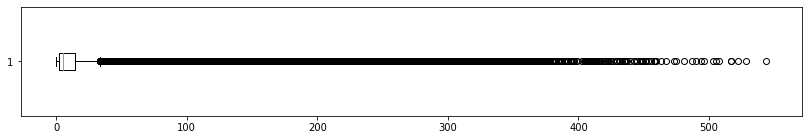

In [113]:
difference = abs(predicted_final - exp_y)
print('Mean Absolute Error = ', np.mean(difference))
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert = False)
plt.show()